In [2]:
from models.fine_tuned_BERT_models.classifier import BERTBasedModel
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator
from train_llm.config import MODELS_DIR

c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataloader = AnnotationDataLoader()
test = dataloader.get_test_all()

model_link = "Mila-MP/inPhormer-LLM-classifier"
subfolder = "final_llm"

In [5]:
llm = BERTBasedModel(model_dir=model_link, subfolder=subfolder)


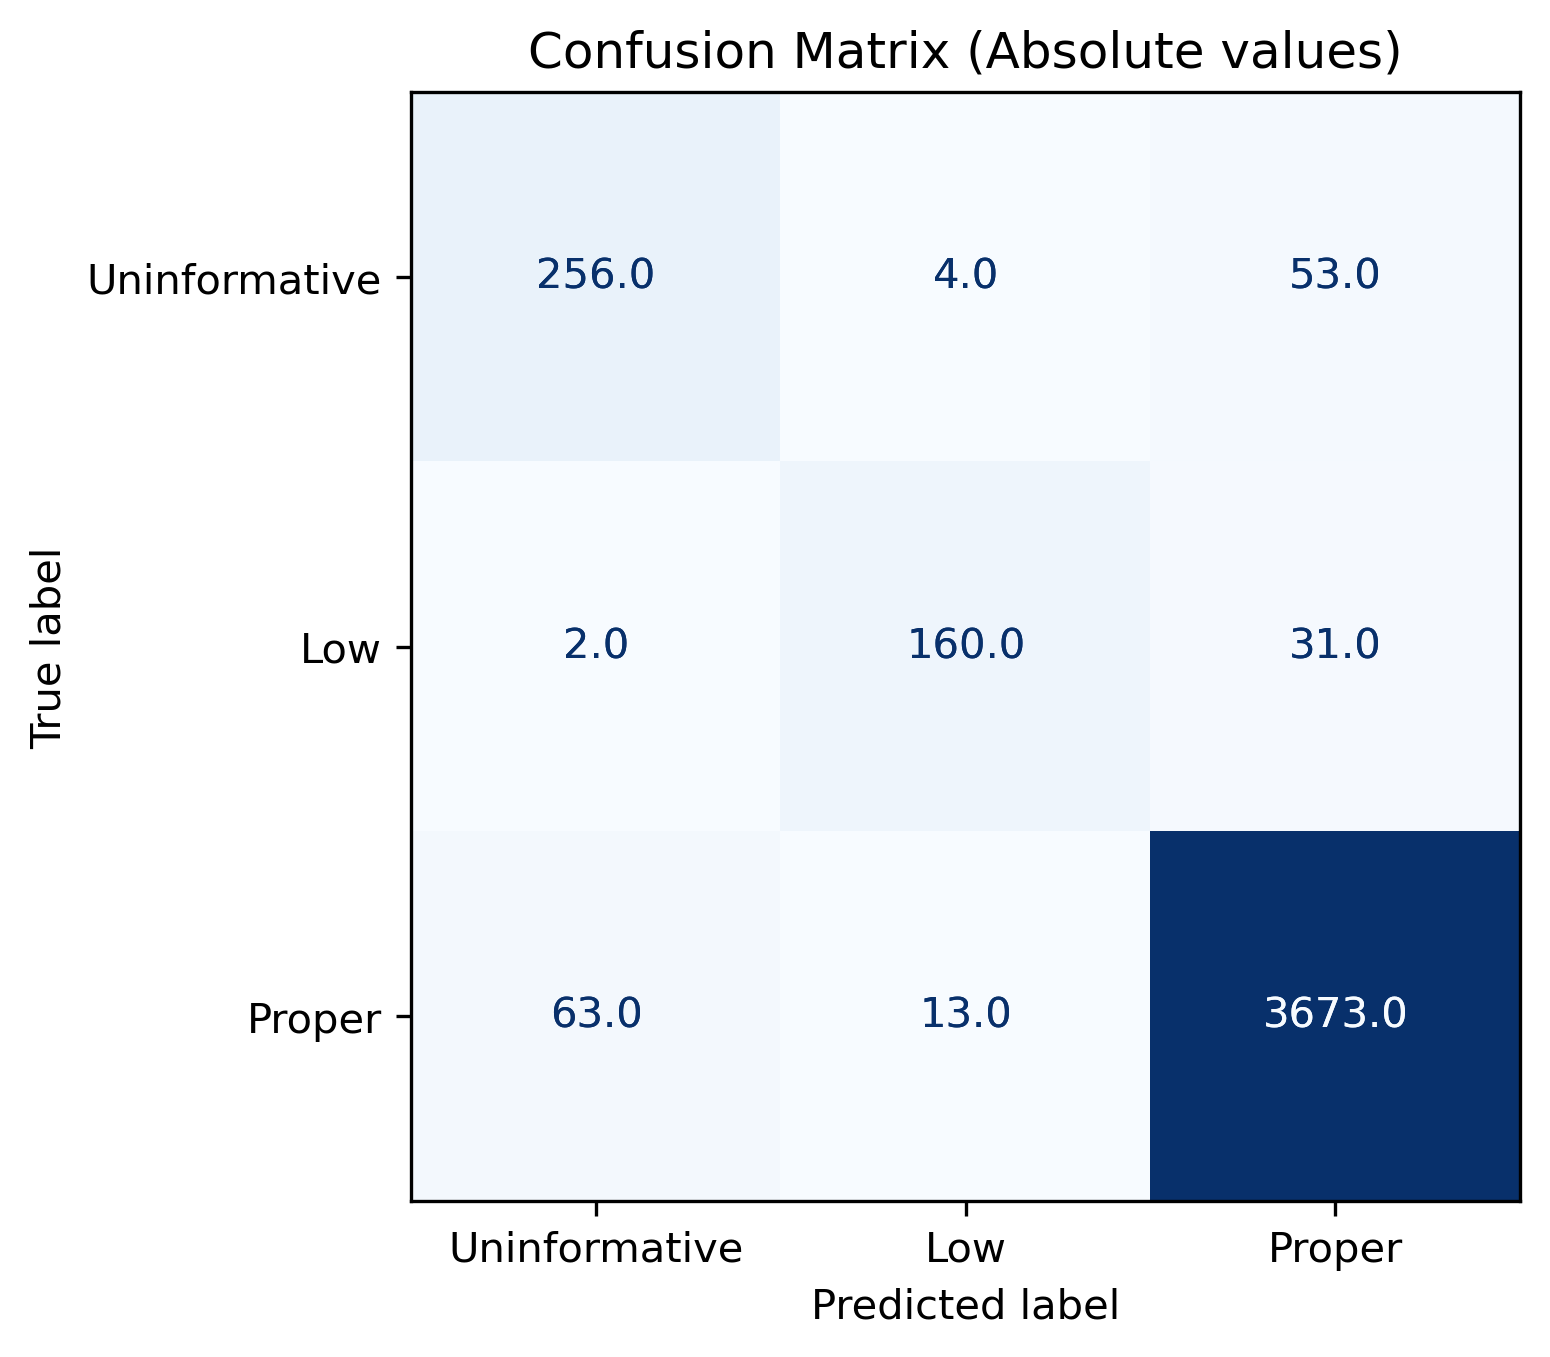
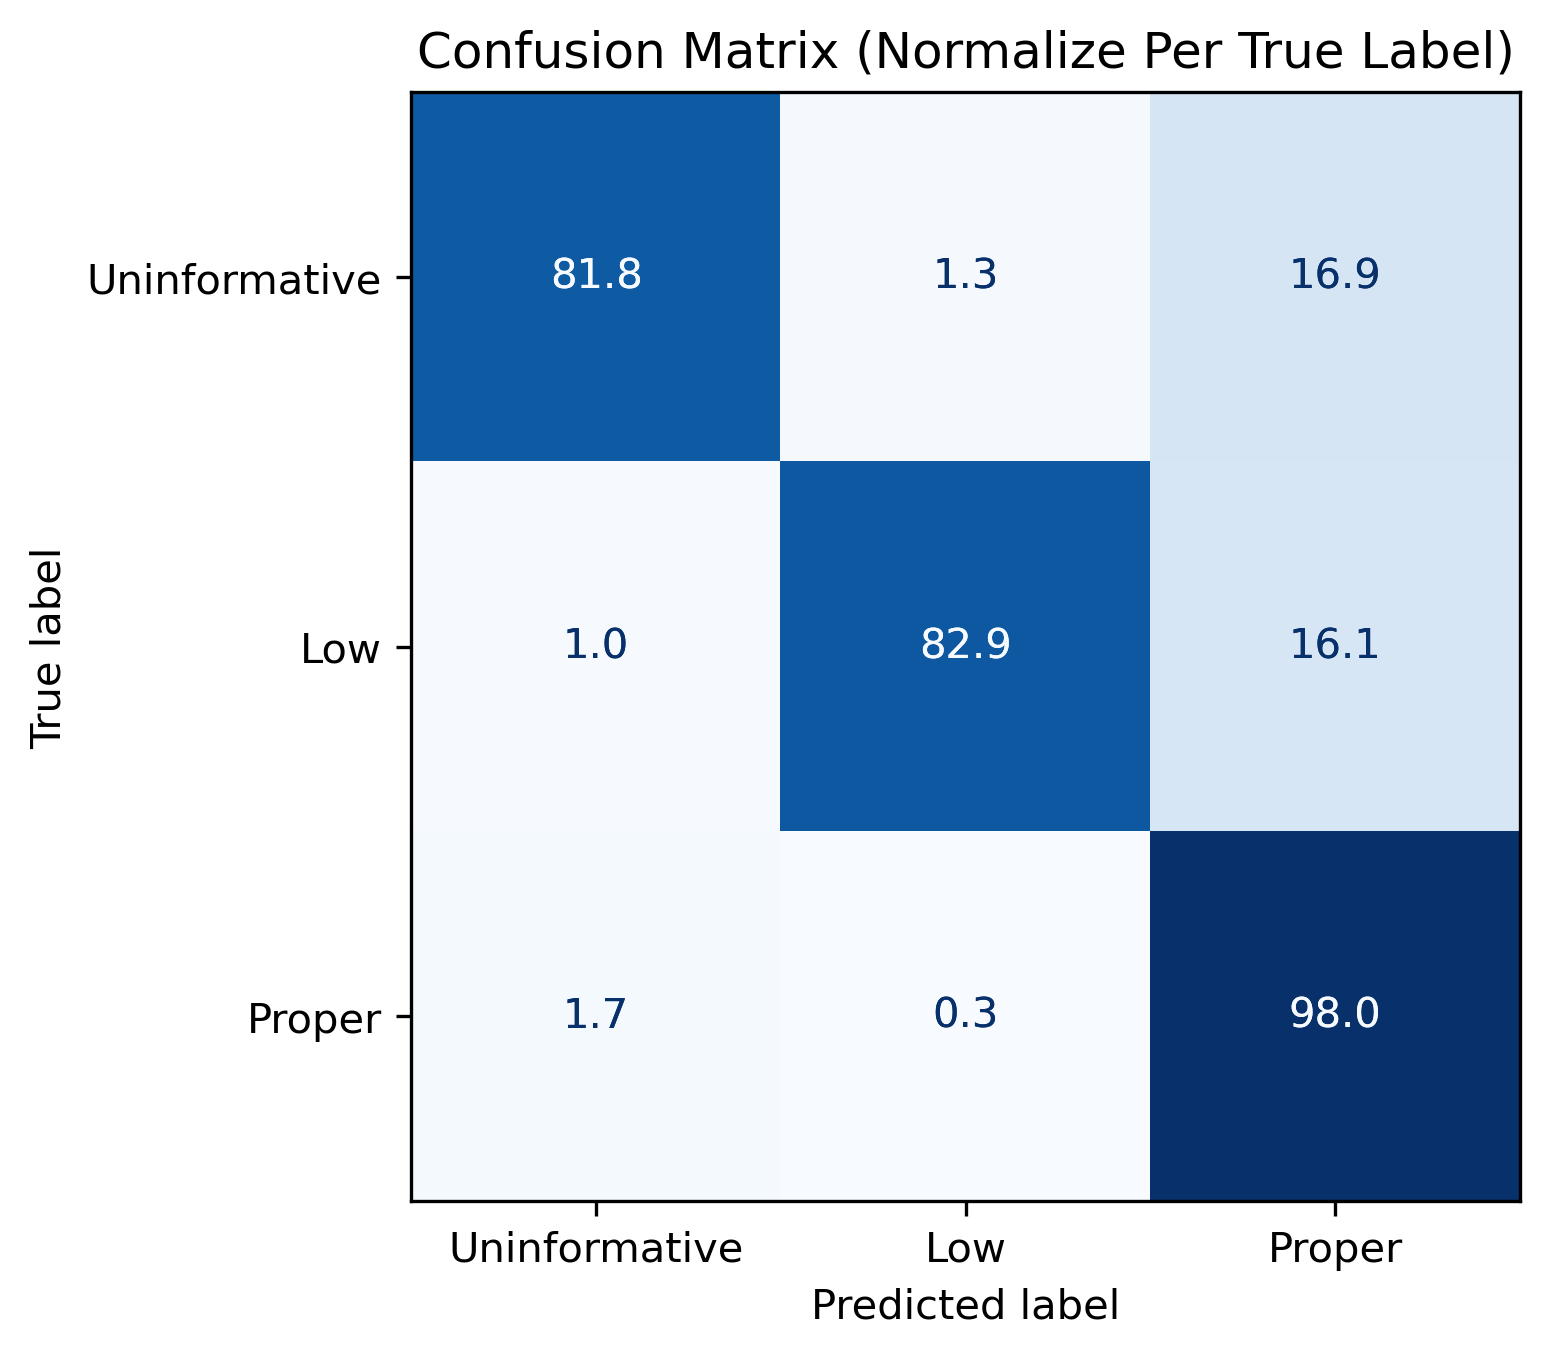

In [6]:
llm_wrapper = ModelEvalWrapper(llm, "LLM, lr 2e-5, 5 epochs, no label smoothing")
llm_evaluator = ModelEvaluator(llm_wrapper, test)
llm_report = llm_evaluator.generate_report()
llm_report.show_report()